<a href="https://colab.research.google.com/github/issacridhin/S5_Predictive-Analysis/blob/main/2348546_Lab7_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [4]:

data = pd.read_csv("/content/AirPassengers.csv", parse_dates=['Month'], index_col='Month')
data.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
data.columns

Index(['#Passengers'], dtype='object')

In [6]:
data.isnull().sum()

,0
#Passengers,0


Text(0.5, 0, 'Passengers')

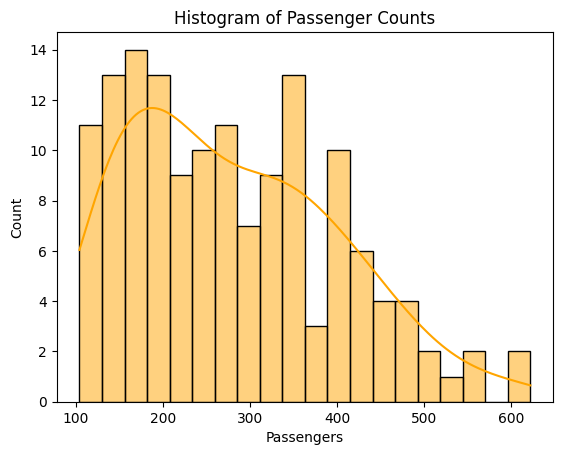

In [29]:
# Access the column using its actual name (likely '#Passengers')
sns.histplot(data['#Passengers'], bins=20, kde=True, color="orange")
plt.title("Histogram of Passenger Counts")
plt.xlabel("Passengers")

- The histogram reveals a right-skewed means positively skewed distribution of passenger counts, indicating that most counts are concentrated in the lower range.  

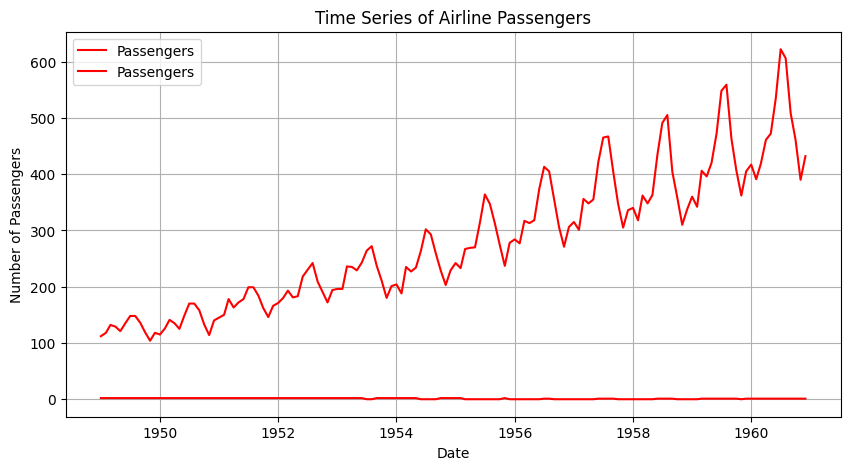

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(data, label='Passengers', color='red')
plt.title('Time Series of Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

We can see a clear upward trend over the years, indicating a general increase in the number of passengers over time.

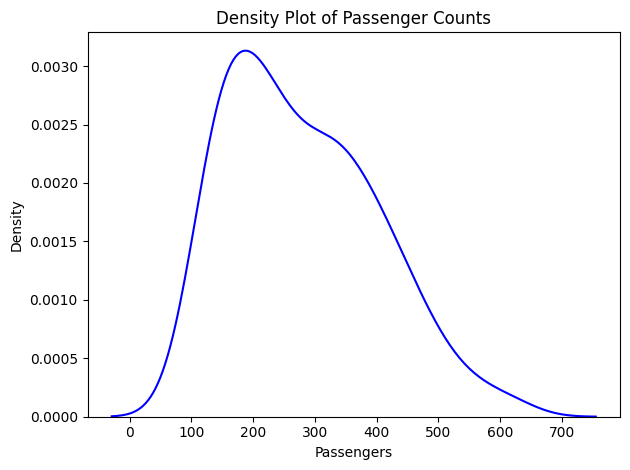

In [30]:
sns.kdeplot(data['#Passengers'], color="blue")
plt.title("Density Plot of Passenger Counts")
plt.xlabel("Passengers")
plt.tight_layout()
plt.show()

# ACF and PACF plots


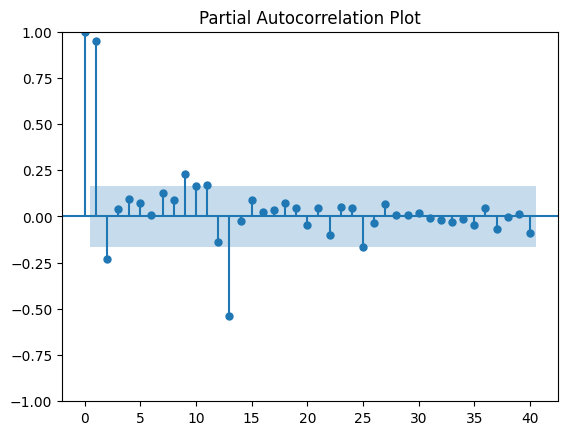

In [31]:
plot_pacf(data['#Passengers'], lags=40)
plt.title("Partial Autocorrelation Plot")
plt.show()

- The PACF plot shows prominent spikes at the initial lags, followed by a rapid decline. These significant lags can help identify the order of the autoregressive (AR) component in time series models like ARIMA.

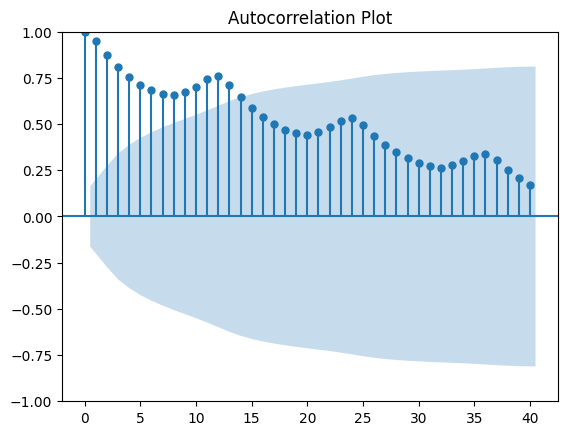

In [32]:
plot_acf(data['#Passengers'], lags=40)
plt.title("Autocorrelation Plot")
plt.show()

- The ACF plot displays a gradual decay, reflecting a strong correlation between the current data point and its past values (lags). This gradual decline suggests the presence of a trend and/or seasonality in the data.  


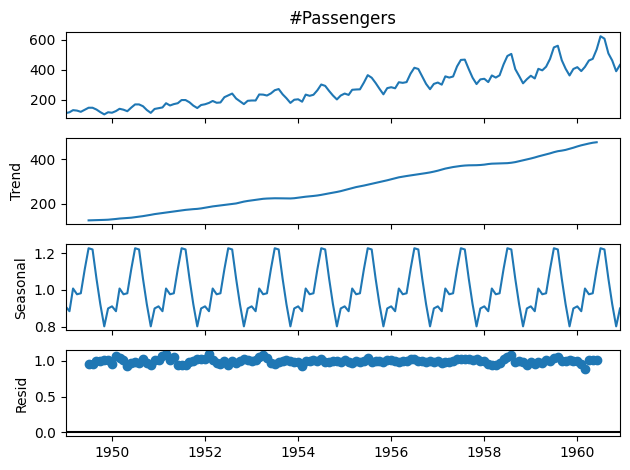

In [34]:
# Seasonal Decomposition
result = seasonal_decompose(data['#Passengers'], model='multiplicative', period=12)
result.plot()
plt.show()

- Trend: Its in upward trajectory, indicating a steady increase in the number of airline passengers over time.

- Seasonality: This pattern appears to follow an annual cycle, likely driven by seasonal travel trends.  

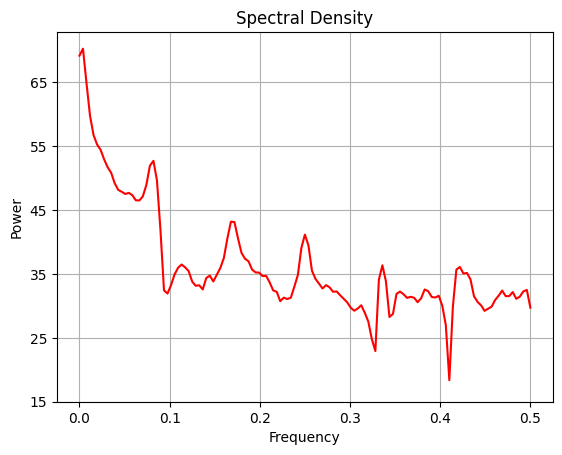

In [35]:
# Spectral Analysis
freqs, psd = plt.psd(data['#Passengers'], NFFT=256, Fs=1, color="red")
plt.title("Spectral Density")
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

- The plot reveals a noticeable peak at a low frequency, corresponding to the long-term trend observed in earlier analyses. This strong low-frequency component confirms the presence of a trend in the data.  
- Smaller peaks at higher frequencies are evident, likely associated with the seasonal patterns present in the data.  

In [16]:
# Clustering before Classification
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

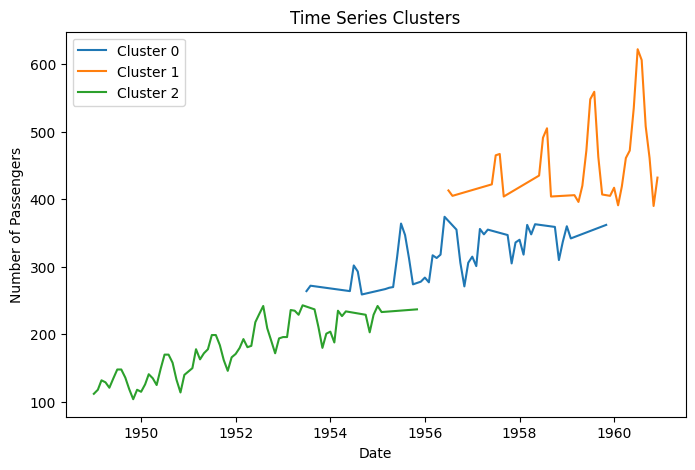

In [37]:
# Plot clusters
plt.figure(figsize=(8, 5))
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    plt.plot(cluster_data.index, cluster_data['#Passengers'], label=f'Cluster {cluster}')
plt.title("Time Series Clusters")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

There are three clusters that we have.

Cluster 0: This cluster represents the initial period of the time series with lower passenger counts and a relatively flat trend.

Cluster 1: This cluster captures the middle period with a moderate increase in passenger counts and a more pronounced upward trend.

Cluster 2: This cluster represents the later period with the highest passenger counts and a steep upward trend.

#ARIMA

In [19]:
# Train ARIMA Model
train_size = int(len(data) * 0.8)
train, test = data['#Passengers'][:train_size], data['#Passengers'][train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
# Forecast
forecast = model_fit.forecast(steps=len(test))
test_forecast = forecast

# Evaluation Metrics
mae = mean_absolute_error(test, test_forecast)
rmse = sqrt(mean_squared_error(test, test_forecast))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 67.3835005901074
Root Mean Squared Error (RMSE): 80.66394528577948


From the above results we can say that,

1. The MAE of 67.38 indicates that, on average, the model's predictions are off by approximately 67.38 passengers from the actual values. This provides a measure of the average magnitude of errors in the forecast.

2. Its the square root and it is more sensitive to larger errors compared to MAE. An RMSE of 80.66 suggests that the model's predictions can deviate from the actual values by up to 80.66 passengers or more in some cases.

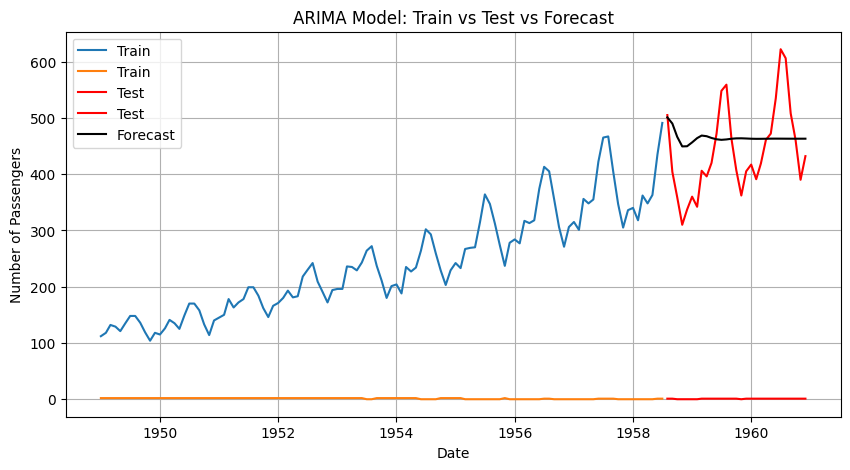

In [41]:
# Plot predictions vs actuals
plt.figure(figsize=(10, 5))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color="red")
plt.plot(test.index, test_forecast, label="Forecast", color="black")
plt.title("ARIMA Model: Train vs Test vs Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()

The forecasted values black appears to be relatively flat, failing to reflect the sharp peaks and troughs seen in the actual test data (blue) color.

Hence we can say that ARIMA model does not perform well even after including its seasonal variations.

#SARIMA

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
data.columns = ['#Passengers', 'Cluster']

# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Define SARIMA parameters (p, d, q) x (P, D, Q, m)
p, d, q = 1, 1, 1       # Non-seasonal parameters
P, D, Q, m = 1, 1, 1, 12  # Seasonal parameters (m=12 for monthly seasonality)

# Fit the SARIMA model
sarima_model = SARIMAX(train['#Passengers'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, m),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False)

# Forecast on the test set
sarima_forecast = sarima_fit.forecast(steps=len(test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA Model - Mean Absolute Error (MAE): 25.268045535098548
SARIMA Model - Root Mean Squared Error (RMSE): 31.78729734327916


In [43]:
# Evaluate the SARIMA model#
mae = mean_absolute_error(test['#Passengers'], sarima_forecast)
rmse = sqrt(mean_squared_error(test['#Passengers'], sarima_forecast))

print(f"SARIMA Model: Mean Absolute Error (MAE): {mae}")
print(f"SARIMA Model: Root Mean Squared Error (RMSE): {rmse}")


SARIMA Model: Mean Absolute Error (MAE): 25.268045535098548
SARIMA Model: Root Mean Squared Error (RMSE): 31.78729734327916


* The SARIMA model performs much better than the ARIMA model.

* The MAE of 25.27 indicates that, on average, the SARIMA model's predictions are off by approximately 25.27 passengers from the actual values. This represents a significant improvement compared to the ARIMA model's MAE of 67.38.

* RMSE of 31.79 is considerably lower than the ARIMA model's RMSE of 80.66, indicating a substantial reduction in prediction errors.

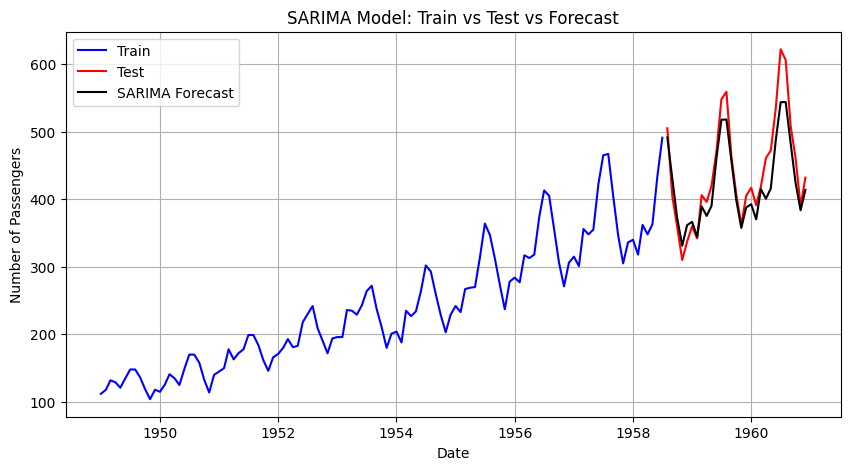

In [44]:
# Plot the Train, Test, and Forecasted values
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['#Passengers'], label='Train', color='blue')
plt.plot(test.index, test['#Passengers'], label='Test', color='red')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='black')
plt.title("SARIMA Model: Train vs Test vs Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()

we can see the black line follows the pattern and it seems sarima model was able to forecast better than arima model.